**THE SPARKS FOUNDATION**

Data Science and Business Analytics Internship (GRIP May2021)

**TASK 1**: PREDICTION USING SUPERVISED ML

PROBLEM: Predict the percentage of marks of the students based on the number of study hours

AUTHOR: SOUL MARIYA JAMES


**IMPORTING THE REQUIRED LIBRARIES**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

**IMPORTING THE DATASET**

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


CHECK IF THERE IS NULL VALUE PRESENT IN THE DATASET

In [6]:
df.isnull == True

False

There is no null value in the dataset

**DATA VISUALIZATION :**

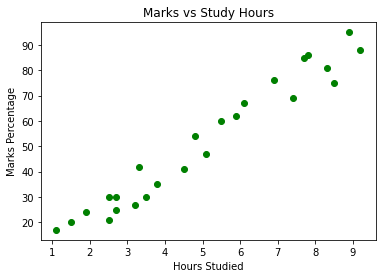

In [14]:
plt.title('Marks vs Study Hours')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Percentage")
plt.scatter(df.Hours, df.Scores, color='green')
plt.show()

To summarise the given data

In [26]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Confirmation of correlation

In [25]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**PREPARE THE DATA**

In [15]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values 

In [23]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**TRAINING THE MODEL**                             

1) SPLITTING THE DATA

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [28]:
print("x train.shape = ", x_train.shape)
print("y train.shape = ", y_train.shape)
print("x test.shape = ", x_test.shape)
print("y test.shape = ", y_test.shape)                              

x train.shape =  (18, 1)
y train.shape =  (18,)
x test.shape =  (7, 1)
y test.shape =  (7,)


2) FITTING THE LINEAR REGRESSION MODEL

In [29]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the regression line

In [31]:
line = regression.coef_*x+regression.intercept_

Plotting the test data

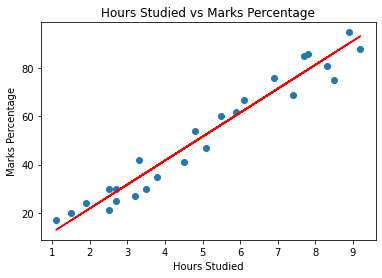

In [34]:
plt.scatter(x, y)
plt.plot(x, line, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Percentage")
plt.title("Hours Studied vs Marks Percentage")
plt.show()

**MAKING PREDICTIONS ON TEST DATA**

In [36]:
x_pred = regression.predict(x_train)
y_pred = regression.predict(x_test)

**DATA VISUALIZATION**

1) FOR TRAINING SET

Text(0.5, 1.0, 'Hours Studied vs Marks Percentage')

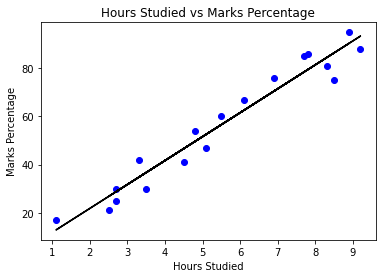

In [38]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, x_pred, color="black")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Percentage")
plt.title("Hours Studied vs Marks Percentage")

2) FOR TEST SET

Text(0.5, 1.0, 'Hours Studied vs Marks Percentage')

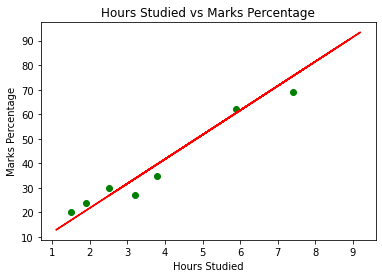

In [39]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_train, x_pred, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Percentage")
plt.title("Hours Studied vs Marks Percentage")

**COMPARING THE PREDICTED MARKS WITH ACTUAL MARKS**

In [40]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**VISUALIZING THE COMPARISON**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


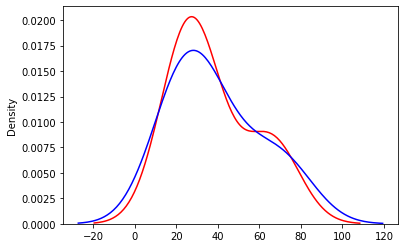

In [44]:
ax1 = sns.distplot(y_test, hist=False, color="red", label="Actual Marks")
sns.distplot(y_pred, hist=False, color="blue", label="Predicted Marks", ax=ax1)

**EVALUATING THE MODEL**

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996


Small value of Mean Absolute Error implies that the chances of error are very less

**WHAT WILL BE THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 HRS/DAY?**

In [47]:
Prediction_score = regression.predict([[9.25]])
print("Prediction Score of a student studying 9.25 hours: ", Prediction_score)

Prediction Score of a student studying 9.25 hours:  [93.89272889]


**CONCLUSION:**
 
If a student studies for 9.25 hours per day then the predicted score of the student is likely to be 93.89.

**THANK YOU !!**